In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

from sklearn.metrics import silhouette_score




In [3]:
def delete_columns_from_csv(file_path, columns_to_delete, output_file_path=None):
   
    df = pd.read_csv(file_path)
    
    
    df.drop(columns=columns_to_delete, inplace=True, errors='ignore')
    
    
    if output_file_path:
        df.to_csv(output_file_path, index=False)
    
    return df


In [4]:
### Profile 
file_path_Profile = "C:\\Users\\annak\\Desktop\\ML-Project\\company_profiles.csv"
columns_to_delete_Profile = ['description', 'mic_code','website','type','CEO','address','city','phone']
output_file_path_profile = 'C:\\Users\\annak\\Desktop\\ML-Project\\FinalProjetProfile.csv'
### Income
file_path_Income = "C:\\Users\\annak\\Desktop\\ML-Project\\income_statements.csv"
columns_to_delete_Income = ['pretax_income', 'income_tax','ebit']
output_file_path_Income = 'C:\\Users\\annak\\Desktop\\ML-Project\\FinalProjetIncome.csv'

### cash flow 
file_path_Cash_Flow = "C:\\Users\\annak\\Desktop\\ML-Project\\cash_flow_data.csv"
columns_to_delete_Cash_Flow = [ 'operating_activities.net_income','operating_activities.depreciation','operating_activities.deferred_taxes','operating_activities.stock_based_compensation','operating_activities.other_non_cash_items','operating_activities.accounts_receivable','operating_activities.accounts_payable','operating_activities.other_assets_liabilities','investing_activities.capital_expenditures','investing_activities.net_intangibles','investing_activities.net_acquisitions','investing_activities.purchase_of_investments','investing_activities.sale_of_investments','investing_activities.other_investing_activity','financing_activities.long_term_debt_issuance','financing_activities.long_term_debt_payments','financing_activities.short_term_debt_issuance','financing_activities.common_stock_issuance','financing_activities.common_stock_repurchase','financing_activities.common_dividends','financing_activities.other_financing_charges','exchange_timezone','period']
output_file_path_Cash_Flow = 'C:\\Users\\annak\\Desktop\\ML-Project\\FinalProjet_CashFlow.csv'

### modified csv all 

modified_df_Profile = delete_columns_from_csv(file_path_Profile, columns_to_delete_Profile, output_file_path_profile)
modified_df_Income = delete_columns_from_csv(file_path_Income, columns_to_delete_Income, output_file_path_Income)
modified_df_CashFlow = delete_columns_from_csv(file_path_Cash_Flow, columns_to_delete_Cash_Flow, output_file_path_Cash_Flow)


In [5]:
modified_df_Profile.columns

Index(['symbol', 'name', 'exchange', 'sector', 'industry', 'employees', 'zip',
       'state', 'country'],
      dtype='object')

balance_sheet_data - modify to be a table and not array with array as string in csv

In [6]:
from pandas import json_normalize
import ast

df = pd.read_csv("C:\\Users\\annak\\Desktop\\ML-Project\\balance_sheet_data.csv")


def convert_if_string(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except (ValueError, SyntaxError):
        return x

def recursive_flatten_columns(df, prefix=''):
    for column in df.columns:

        df[column] = df[column].apply(convert_if_string)
        
        if isinstance(df[column].iloc[0], dict):
            # Flatten dictionaries directly into the DataFrame
            temp_df = json_normalize(df[column])
            temp_df.columns = [f"{prefix}{column}.{subcol}" for subcol in temp_df.columns]
            df = df.drop(column, axis=1).join(temp_df)
        elif isinstance(df[column].iloc[0], list):

            pass  
    return df

df_flattened = recursive_flatten_columns(df)


In [7]:
columns_to_keep = [
    "fiscal_date", 
    "symbol", 
    "assets.total_assets", 
    "assets.current_assets.total_current_assets", 
    "assets.non_current_assets.total_non_current_assets", 
    "liabilities.total_liabilities", 
    "liabilities.current_liabilities.short_term_debt", 
    "liabilities.current_liabilities.total_current_liabilities", 
    "liabilities.non_current_liabilities.long_term_debt", 
    "liabilities.non_current_liabilities.total_non_current_liabilities", 
    "shareholders_equity.common_stock", 
    "shareholders_equity.retained_earnings", 
    "shareholders_equity.other_shareholders_equity", 
    "shareholders_equity.total_shareholders_equity", 
    "shareholders_equity.additional_paid_in_capital", 
    "shareholders_equity.treasury_stock", 
    "shareholders_equity.minority_interest"
]

df_filtered = df_flattened[columns_to_keep]

print(df_filtered.head())


  fiscal_date symbol  assets.total_assets  \
0  2023-06-30   MSFT         4.119760e+11   
1  2022-06-30   MSFT         3.648400e+11   
2  2021-06-30   MSFT         3.337790e+11   
3  2020-06-30   MSFT         3.013110e+11   
4  2019-06-30   MSFT         2.865560e+11   

   assets.current_assets.total_current_assets  \
0                                1.842570e+11   
1                                1.696840e+11   
2                                1.844060e+11   
3                                1.819150e+11   
4                                1.755520e+11   

   assets.non_current_assets.total_non_current_assets  \
0                                       2.277190e+11    
1                                       1.951560e+11    
2                                       1.493730e+11    
3                                       1.193960e+11    
4                                       1.110040e+11    

   liabilities.total_liabilities  \
0                   2.057530e+11   
1                  

In [8]:
rename_columns = {
    "fiscal_date": "fiscal_date",
    "symbol": "symbol",
    "assets.total_assets": "total_assets",
    "assets.current_assets.total_current_assets": "total_current_assets",
    "assets.non_current_assets.total_non_current_assets": "total_non_current_assets",
    "liabilities.total_liabilities": "total_liabilities",
    "liabilities.current_liabilities.short_term_debt": "short_term_debt",
    "liabilities.current_liabilities.total_current_liabilities": "total_current_liabilities",
    "liabilities.non_current_liabilities.long_term_debt": "long_term_debt",
    "liabilities.non_current_liabilities.total_non_current_liabilities": "total_non_current_liabilities"
}


df_filtered = df_filtered.rename(columns=rename_columns)


print(df_filtered.head())

  fiscal_date symbol  total_assets  total_current_assets  \
0  2023-06-30   MSFT  4.119760e+11          1.842570e+11   
1  2022-06-30   MSFT  3.648400e+11          1.696840e+11   
2  2021-06-30   MSFT  3.337790e+11          1.844060e+11   
3  2020-06-30   MSFT  3.013110e+11          1.819150e+11   
4  2019-06-30   MSFT  2.865560e+11          1.755520e+11   

   total_non_current_assets  total_liabilities  short_term_debt  \
0              2.277190e+11       2.057530e+11     5.247000e+09   
1              1.951560e+11       1.982980e+11     2.749000e+09   
2              1.493730e+11       1.917910e+11     8.072000e+09   
3              1.193960e+11       1.830070e+11     3.749000e+09   
4              1.110040e+11       1.669680e+11     5.516000e+09   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   

In [9]:
df_filtered.to_csv('flat_balance_sheet_data.csv', index=False)


In [10]:
modified_df_CashFlow.head() 	

fiscal_date  end_cash_position  income_tax_paid  interest_paid  \
0  2020-06-30        13576000000              NaN            NaN   
1  2021-06-30        14224000000              NaN            NaN   
2  2022-06-30        13931000000              NaN            NaN   
3  2023-06-30        34704000000              NaN            NaN   
4  2020-09-30        39789000000     9.501000e+09   3.002000e+09   

   free_cash_flow  operating_activities.operating_cash_flow  \
0    4.523400e+10                              6.089400e+10   
1    5.611800e+10                              7.798900e+10   
2    6.514900e+10                              8.944400e+10   
3    5.947500e+10                              8.738600e+10   
4    7.336500e+10                              8.067400e+10   

   investing_activities.investing_cash_flow  \
0                             -1.222300e+10   
1                             -2.757700e+10   
2                             -3.031100e+10   
3                             -2.268000e+10   
4                             -4.289000e+09   

   financing_activities.financing_cash_flow symbol            name currency  \
0                             -4.603100e+10   MSFT  Microsoft Corp      USD   
1                             -4.848600e+10   MSFT  Microsoft Corp      USD   
2                             -5.887600e+10   MSFT  Microsoft Corp      USD   
3                             -4.393500e+10   MSFT  Microsoft Corp      USD   
4                             -8.594000e+10   AAPL       Apple Inc      USD   

  exchange mic_code  
0   NASDAQ     XNGS  
1   NASDAQ     XNGS  
2   NASDAQ     XNGS  
3   NASDAQ     XNGS  
4   NASDAQ     XNGS

In [11]:
modified_df_Income.head()

fiscal_date         sales  cost_of_goods  gross_profit  operating_income  \
0  30/06/2023  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1  30/06/2022  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2  30/06/2021  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3  30/06/2020  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4  30/09/2023  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...        ebitda  \
0              7.446000e+09  ...  1.051550e+11   
1              7.496000e+09  ...  9.990500e+10   
2              7.547000e+09  ...  8.383100e+10   
3              7.610000e+09  ...  6.839500e+10   
4              1.574423e+10  ...  1.291880e+11   

   net_income_continuous_operations  minority_interests  \
0                      7.236100e+10                 NaN   
1                      7.273800e+10                 NaN   
2                      6.127100e+10                 NaN   
3                      4.428100e+10                 NaN   
4                      9.699500e+10                 NaN   

   preferred_stock_dividends  research_and_development  \
0                        NaN              2.719500e+10   
1                        NaN              2.451200e+10   
2                        NaN              2.071600e+10   
3                        NaN              1.926900e+10   
4                        NaN              2.991500e+10   

   selling_general_and_administrative  other_operating_expenses        income  \
0                        3.033400e+10                       NaN  2.994000e+09   
1                        2.772500e+10                       NaN  2.094000e+09   
2                        2.522400e+10                       NaN  2.131000e+09   
3                        2.470900e+10                       NaN  2.680000e+09   
4                        2.493200e+10                       NaN  3.750000e+09   

        expense  symbol  
0  1.968000e+09    MSFT  
1  2.063000e+09    MSFT  
2  2.346000e+09    MSFT  
3  2.591000e+09    MSFT  
4  3.933000e+09    AAPL  

[5 rows x 21 columns]

now we merge all data in symbol+year, we will create year colunm for each table first

In [12]:
import pandas as pd

def add_year_column(dataframe, date_column='Date', output_column='year', date_format='%d/%m/%Y'):
    """
    Adds a 'year' column to a DataFrame based on a specified 'Date' column.
    
    Parameters:
    - dataframe: pd.DataFrame, the DataFrame to modify.
    - date_column: str, the name of the column containing date information.
    - output_column: str, the name of the new column to be added, containing the extracted year.
    - date_format: str, the format of the dates in the date_column.
    
    Returns:
    - A DataFrame with the new 'year' column added.
    """
    # Ensure the date_column is in datetime format
    dataframe[date_column] = pd.to_datetime(dataframe[date_column], format=date_format)
    
    # Extract the year and create the new column
    dataframe[output_column] = dataframe[date_column].dt.year
    
    return dataframe







In [13]:
modified_df_Income = add_year_column(modified_df_Income, 'fiscal_date', 'year')
modified_df_CashFlow = add_year_column(modified_df_CashFlow,'fiscal_date', 'year','%Y-%m-%d')
modified_balance_sheet = add_year_column(df_filtered, 'fiscal_date', 'year', '%Y-%m-%d')

print(modified_df_Income[['fiscal_date', 'year']].head())
print(modified_df_CashFlow[['fiscal_date', 'year']].head())
print(modified_balance_sheet[['fiscal_date', 'year']].head())

  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2023-09-30  2023
  fiscal_date  year
0  2020-06-30  2020
1  2021-06-30  2021
2  2022-06-30  2022
3  2023-06-30  2023
4  2020-09-30  2020
  fiscal_date  year
0  2023-06-30  2023
1  2022-06-30  2022
2  2021-06-30  2021
3  2020-06-30  2020
4  2019-06-30  2019


Merge

In [14]:
print(len(modified_df_Income))
print(len(modified_df_CashFlow))
print(len(modified_balance_sheet))

5478
5439
8087


In [15]:
# Check for duplicates based on 'year' and 'symbol'
print(modified_df_Income.duplicated(subset=['year', 'symbol']).sum())
print(modified_df_CashFlow.duplicated(subset=['year', 'symbol']).sum())
print(modified_balance_sheet.duplicated(subset=['year', 'symbol']).sum())


12
6
99


drop duplicates

In [16]:

modified_df_Income = modified_df_Income.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_df_CashFlow = modified_df_CashFlow.drop_duplicates(subset=['year', 'symbol'], keep=False)
modified_balance_sheet = modified_balance_sheet.drop_duplicates(subset=['year', 'symbol'], keep=False)

print( len(modified_df_Income))
print(len(modified_df_CashFlow))
print( len(modified_balance_sheet))


5454
5427
7890


In [17]:
merged_df_2 = pd.merge(modified_df_Income, modified_df_CashFlow, on=['year', 'symbol'], how='inner')


final_merged_df = pd.merge(merged_df_2, modified_balance_sheet, on=['year', 'symbol'], how='inner')

print(len(final_merged_df))
print(final_merged_df.head())

5365
  fiscal_date_x         sales  cost_of_goods  gross_profit  operating_income  \
0    2023-06-30  2.119150e+11   6.586300e+10  1.460520e+11      8.852300e+10   
1    2022-06-30  1.982700e+11   6.265000e+10  1.356200e+11      8.338300e+10   
2    2021-06-30  1.680880e+11   5.223200e+10  1.158560e+11      6.991600e+10   
3    2020-06-30  1.430150e+11   4.607800e+10  9.693700e+10      5.295900e+10   
4    2023-09-30  3.832850e+11   2.141370e+11  1.691480e+11      1.143010e+11   

   other_income_expense    net_income  eps_basic  eps_diluted  \
0         -2.380000e+08  7.236100e+10       9.72         9.68   
1          3.020000e+08  7.273800e+10       9.70         9.65   
2          1.401000e+09  6.127100e+10       8.12         8.05   
3         -1.200000e+07  4.428100e+10       5.82         5.76   
4         -3.820000e+08  9.699500e+10       6.16         6.13   

   basic_shares_outstanding  ...  total_current_liabilities  long_term_debt  \
0              7.446000e+09  ...            

In [18]:
final_merged_df.to_csv('final_merged_df', index=False)


missing values


In [19]:
# we drop all data without net income. after earching the data for the rest, we safely fillna(0).
final_merged_df = final_merged_df.dropna(subset=[ 'net_income'])
final_merged_df = final_merged_df.fillna(0)


print(f"Number of rows after dropping NaNs in 'net_income': {final_merged_df.shape[0]}")

Number of rows after dropping NaNs in 'net_income': 5363


Next, we want only stocks with 3 years of data and more

In [20]:
ticker_counts = final_merged_df['symbol'].value_counts()

tickers_with_3_or_more_years = ticker_counts[ticker_counts >= 3]
print(f"Number of companies with data for 3 or more years: {len(tickers_with_3_or_more_years)}")

Number of companies with data for 3 or more years: 1439


In [21]:
tickers_to_keep = tickers_with_3_or_more_years.index.tolist()

In [22]:
final_merged_df = final_merged_df[final_merged_df['symbol'].isin(tickers_to_keep)]


print(f"Number of rows after filtering: {final_merged_df.shape[0]}")

Number of rows after filtering: 5088


In [23]:
distinct_tickers_count = final_merged_df['symbol'].nunique()
distinct_tickers_count

1439

In [24]:
final_merged_df = final_merged_df[[ 'year', 'symbol','fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

In [25]:
final_merged_df.head()

year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   total_current_liabilities  long_term_debt  total_non_current_liabilities  \
0               1.041490e+11    5.471800e+10                   1.016040e+11   
1               9.508200e+10    5.852100e+10                   1.032160e+11   
2               8.865700e+10    5.970300e+10                   1.031340e+11   
3               7.231000e+10    6.724900e+10                   1.106970e+11   
4               1.453080e+11    9.528100e+10                   1.451290e+11   

   shareholders_equity.common_stock  shareholders_equity.retained_earnings  \
0                      9.371800e+10                           1.188480e+11   
1                      8.693900e+10                           8.428100e+10   
2                      8.311100e+10                           5.705500e+10   
3                      8.055200e+10                           3.456600e+10   
4                      7.381200e+10                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  
0                                 0.0                                    0.0  
1                                 0.0                                    0.0  
2                                 0.0                                    0.0  
3                                 0.0                                    0.0  
4                                 0.0                                    0.0  

[5 rows x 46 columns]

In [26]:
corrdf = final_merged_df[['fiscal_date', 'fiscal_date_x','fiscal_date_y', 'sales', 'cost_of_goods', 'gross_profit',
       'operating_income', 'other_income_expense', 'net_income', 'eps_basic',
       'eps_diluted', 'basic_shares_outstanding', 'diluted_shares_outstanding',
       'ebitda', 'net_income_continuous_operations', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'selling_general_and_administrative', 'other_operating_expenses',
       'income', 'expense', 
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'investing_activities.investing_cash_flow',
       'financing_activities.financing_cash_flow',
       'total_assets',
       'total_current_assets', 'total_non_current_assets', 'total_liabilities',
       'short_term_debt', 'total_current_liabilities', 'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.retained_earnings',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.total_shareholders_equity',
       'shareholders_equity.additional_paid_in_capital',
       'shareholders_equity.treasury_stock',
       'shareholders_equity.minority_interest']]

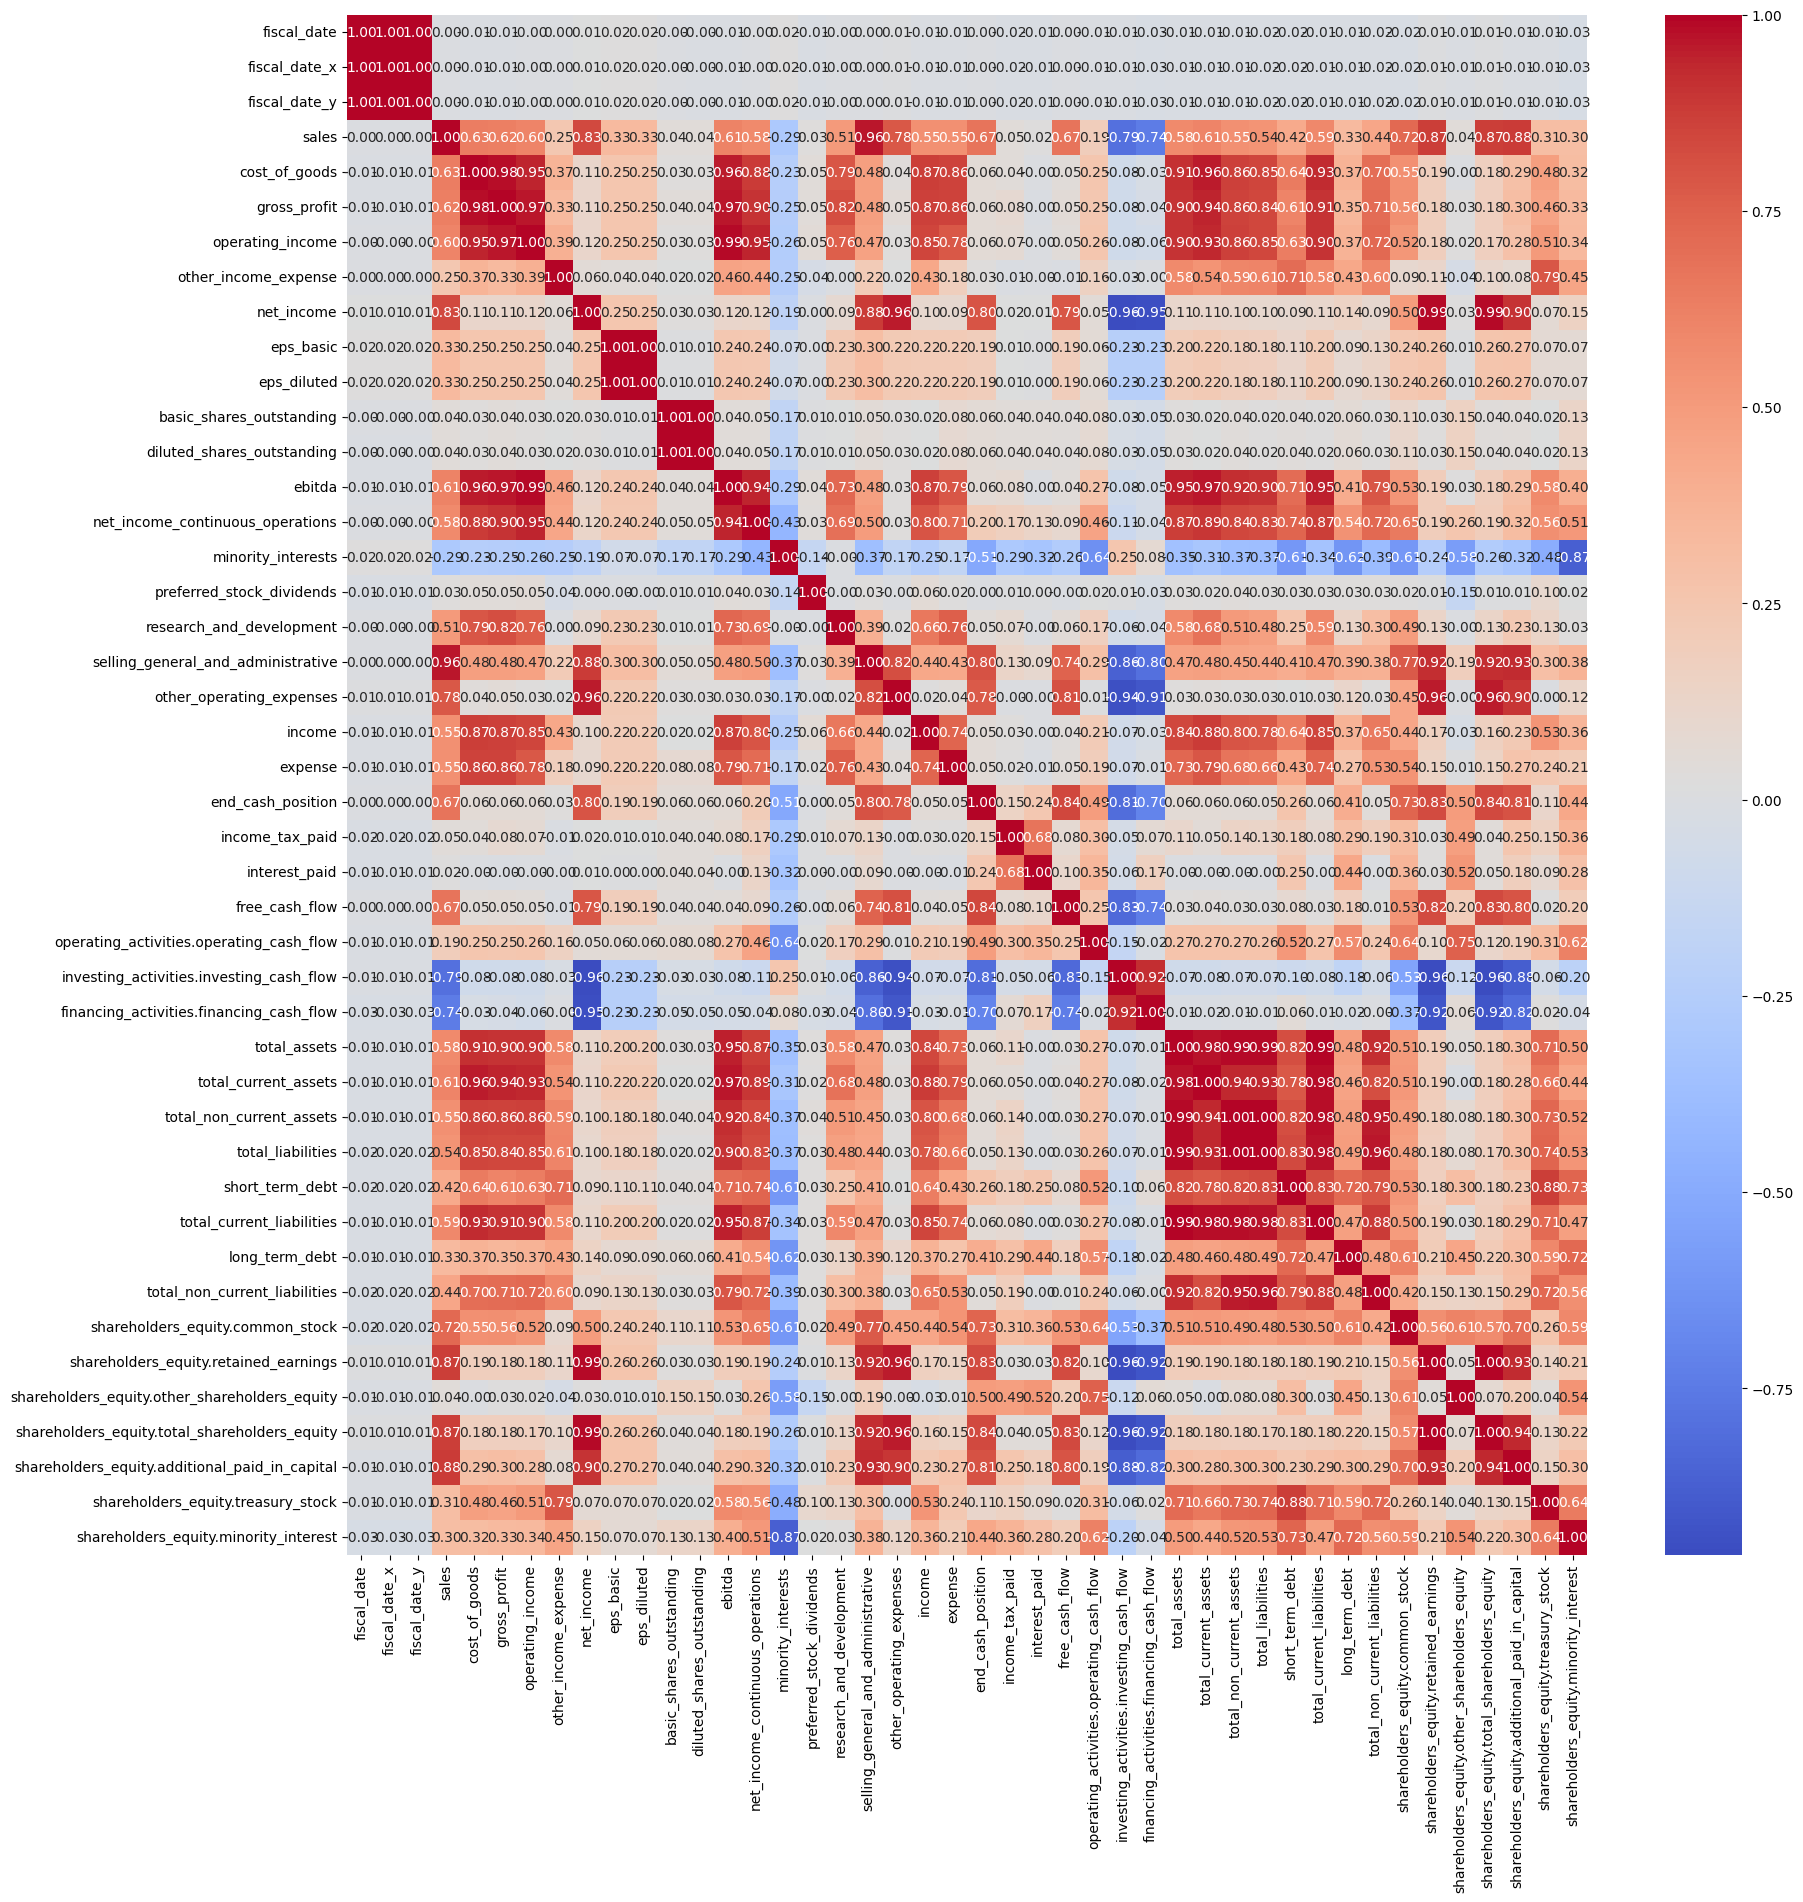

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
corr_matrix = corrdf.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


### Indicator Functions

In [28]:
def calculate_debt_to_equity_ratio(df):

    numerator = df['long_term_debt'] + df['short_term_debt']

    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])


    df['Debt to Equity Ratio'] = np.divide(numerator, denominator)


    df['Debt to Equity Ratio'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Debt to Equity Ratio'].fillna(0, inplace=True)

    return df


def calculate_Profit_Margin(df):

    numerator = df['net_income'] 


    denominator = np.where((df['sales']) == 0,
                           np.nan,
                           df['sales'] )


    df['Profit Margin'] = np.divide(numerator, denominator)


    df['Profit Margin'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Profit Margin'].fillna(0, inplace=True)

    return df


def calculate_Return_On_Equity(df):

    numerator = df['net_income'] 


    denominator = np.where((df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.additional_paid_in_capital']+df['shareholders_equity.minority_interest'] - df['shareholders_equity.treasury_stock']) == 0,
                           np.nan,
                           df['shareholders_equity.common_stock'] + df['shareholders_equity.retained_earnings']+df['shareholders_equity.other_shareholders_equity']+df['shareholders_equity.minority_interest']+df['shareholders_equity.additional_paid_in_capital'] - df['shareholders_equity.treasury_stock'])



    df['Return On Equity'] = np.divide(numerator, denominator)


    df['Return On Equity'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Equity'].fillna(0, inplace=True)

    return df




def calculate_Return_On_Assets(df):

    numerator = df['net_income'] 


    denominator = np.where((df['total_assets']) == 0,
                           np.nan,
                           df['total_assets'] )


    df['Return On Assets'] = np.divide(numerator, denominator)


    df['Return On Assets'].replace([np.inf, -np.inf], 0, inplace=True)


    df['Return On Assets'].fillna(0, inplace=True)

    return df

In [29]:
final_merged_df=calculate_debt_to_equity_ratio(final_merged_df)
final_merged_df=calculate_Profit_Margin(final_merged_df)
final_merged_df=calculate_Return_On_Equity(final_merged_df)
final_merged_df=calculate_Return_On_Assets(final_merged_df)



final_merged_df.head()


year symbol fiscal_date fiscal_date_x fiscal_date_y         sales  \
0  2023   MSFT  2023-06-30    2023-06-30    2023-06-30  2.119150e+11   
1  2022   MSFT  2022-06-30    2022-06-30    2022-06-30  1.982700e+11   
2  2021   MSFT  2021-06-30    2021-06-30    2021-06-30  1.680880e+11   
3  2020   MSFT  2020-06-30    2020-06-30    2020-06-30  1.430150e+11   
4  2023   AAPL  2023-09-30    2023-09-30    2023-09-30  3.832850e+11   

   cost_of_goods  gross_profit  operating_income  other_income_expense  ...  \
0   6.586300e+10  1.460520e+11      8.852300e+10         -2.380000e+08  ...   
1   6.265000e+10  1.356200e+11      8.338300e+10          3.020000e+08  ...   
2   5.223200e+10  1.158560e+11      6.991600e+10          1.401000e+09  ...   
3   4.607800e+10  9.693700e+10      5.295900e+10         -1.200000e+07  ...   
4   2.141370e+11  1.691480e+11      1.143010e+11         -3.820000e+08  ...   

   shareholders_equity.retained_earnings  \
0                           1.188480e+11   
1                           8.428100e+10   
2                           5.705500e+10   
3                           3.456600e+10   
4                          -2.140000e+08   

   shareholders_equity.other_shareholders_equity  \
0                                  -6.343000e+09   
1                                  -4.678000e+09   
2                                   1.822000e+09   
3                                   3.186000e+09   
4                                  -1.145200e+10   

   shareholders_equity.total_shareholders_equity  \
0                                   2.062230e+11   
1                                   1.665420e+11   
2                                   1.419880e+11   
3                                   1.183040e+11   
4                                   6.214600e+10   

   shareholders_equity.additional_paid_in_capital  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   shareholders_equity.treasury_stock  shareholders_equity.minority_interest  \
0                                 0.0                                    0.0   
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   Debt to Equity Ratio  Profit Margin  Return On Equity  Return On Assets  
0              0.290777       0.341462          0.350887          0.175644  
1              0.367895       0.366863          0.436755          0.199370  
2              0.477329       0.364517          0.431522          0.183568  
3              0.600132       0.309625          0.374298          0.146961  
4              1.787533       0.253062          1.560760          0.275098  

[5 rows x 50 columns]

In [30]:
left_columns = [ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

corrdf2 = final_merged_df[[ 'year','sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
       'preferred_stock_dividends', 'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']]




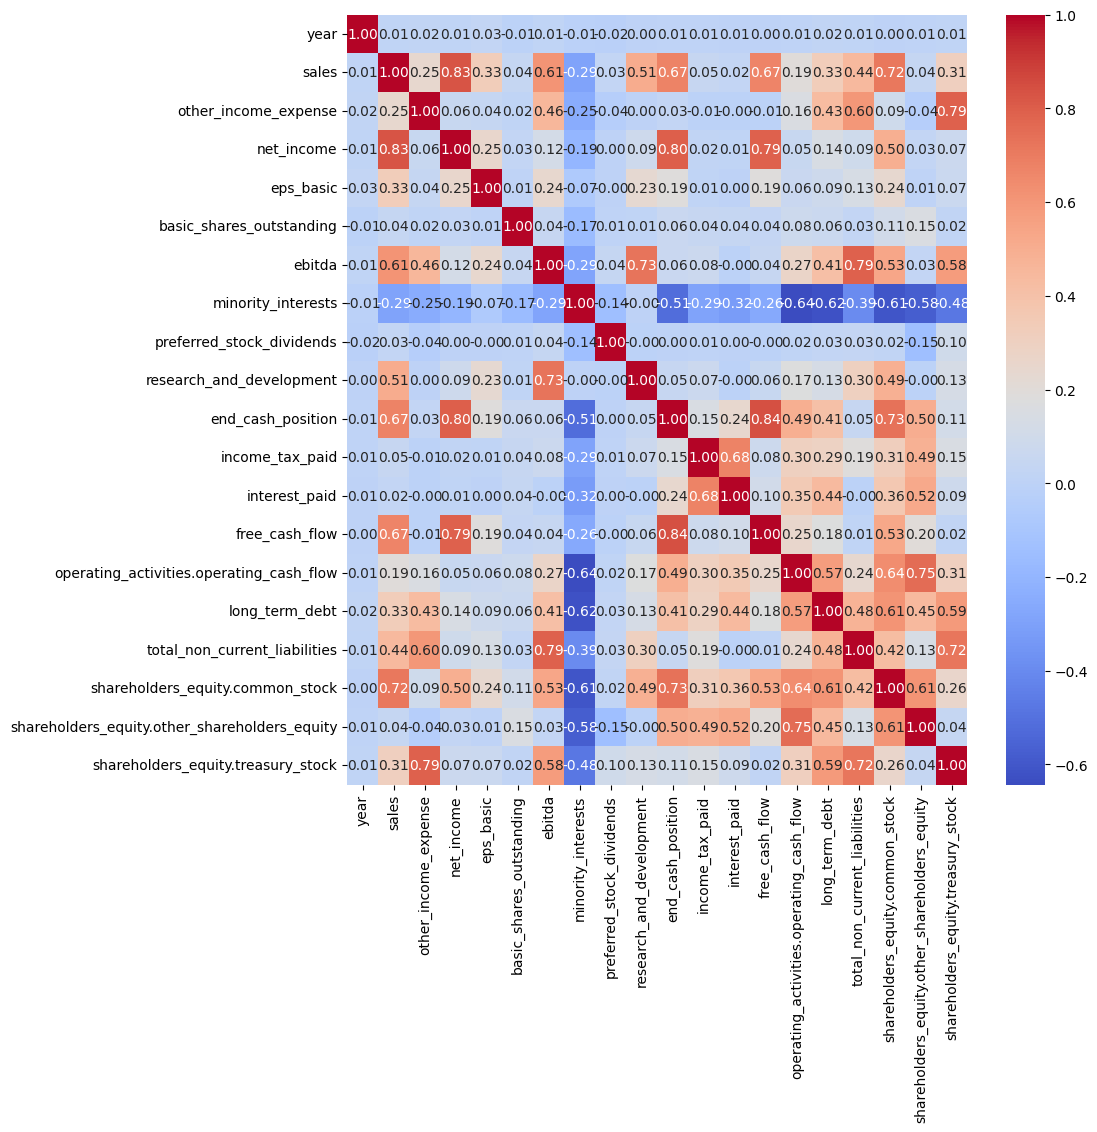

In [31]:


# Assuming `df` is your DataFrame
corr_matrix = corrdf2.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [32]:
final_merged_df = final_merged_df[[ 'year', 'symbol', 'sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets']]
final_merged_df = pd.merge(final_merged_df, modified_df_Profile, on='symbol', how='inner')

final_merged_df.head()


year symbol         sales  other_income_expense    net_income  eps_basic  \
0  2023   MSFT  2.119150e+11         -2.380000e+08  7.236100e+10       9.72   
1  2022   MSFT  1.982700e+11          3.020000e+08  7.273800e+10       9.70   
2  2021   MSFT  1.680880e+11          1.401000e+09  6.127100e+10       8.12   
3  2020   MSFT  1.430150e+11         -1.200000e+07  4.428100e+10       5.82   
4  2023   AAPL  3.832850e+11         -3.820000e+08  9.699500e+10       6.16   

   basic_shares_outstanding        ebitda  minority_interests  \
0              7.446000e+09  1.051550e+11                 0.0   
1              7.496000e+09  9.990500e+10                 0.0   
2              7.547000e+09  8.383100e+10                 0.0   
3              7.610000e+09  6.839500e+10                 0.0   
4              1.574423e+10  1.291880e+11                 0.0   

   research_and_development  ...  Return On Equity  Return On Assets  \
0              2.719500e+10  ...          0.350887          0.175644   
1              2.451200e+10  ...          0.436755          0.199370   
2              2.071600e+10  ...          0.431522          0.183568   
3              1.926900e+10  ...          0.374298          0.146961   
4              2.991500e+10  ...          1.560760          0.275098   

             name  exchange      sector                 industry  employees  \
0  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
1  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
2  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
3  Microsoft Corp    NASDAQ  Technology  Software—Infrastructure     221000   
4       Apple Inc    NASDAQ  Technology     Consumer Electronics     161000   

          zip  state        country  
0  98052-6399     WA  United States  
1  98052-6399     WA  United States  
2  98052-6399     WA  United States  
3  98052-6399     WA  United States  
4       95014     CA  United States  

[5 rows x 32 columns]

In [33]:
# Mapping of specific industries to broader categories, including "Others"
industry_to_category = {
    # Technology
    'Software—Infrastructure': 'Technology',
    'Consumer Electronics': 'Technology',
    'Semiconductors': 'Technology',
    'Internet Retail': 'Technology',
    'Internet Content & Information': 'Technology',
    'Software—Application': 'Technology',
    'Software - Infrastructure': 'Technology',
    'Information Technology Services': 'Technology',
    'Software - Application': 'Technology',
    'Communication Equipment': 'Technology',
    'Electronic Components': 'Technology',
    'Computer Hardware': 'Technology',
    'Electronic Gaming & Multimedia': 'Technology',
    
    # Healthcare & Pharmaceuticals
    'Insurance—Diversified': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers—General': 'Healthcare & Pharmaceuticals',
    'Biotechnology': 'Healthcare & Pharmaceuticals',
    'Diagnostics & Research': 'Healthcare & Pharmaceuticals',
    'Medical Devices': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers—Specialty & Generic': 'Healthcare & Pharmaceuticals',
    'Medical Instruments & Supplies': 'Healthcare & Pharmaceuticals',
    'Medical Care Facilities': 'Healthcare & Pharmaceuticals',
    'Medical Distribution': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers - General': 'Healthcare & Pharmaceuticals',
    'Drug Manufacturers - Specialty & Generic': 'Healthcare & Pharmaceuticals',
    
    # Financial Services
    'Credit Services': 'Financial Services',
    'Banks—Diversified': 'Financial Services',
    'Banks - Diversified': 'Financial Services',
    'Asset Management': 'Financial Services',
    'Footwear & Accessories': 'Financial Services',
    'Capital Markets': 'Financial Services',
    'Banks—Regional': 'Financial Services',
    'Banks - Regional': 'Financial Services',
    'Financial Data & Stock Exchanges': 'Financial Services',
    'Financial Conglomerates': 'Financial Services',
    'Insurance—Property & Casualty': 'Financial Services',
    'Insurance - Property & Casualty': 'Financial Services',
    'Insurance - Specialty': 'Financial Services',
    'Insurance—Specialty': 'Financial Services',
    'Insurance—Reinsurance': 'Financial Services',
    'Insurance - Life': 'Financial Services',
    'Insurance Brokers': 'Financial Services',
    # Including all REIT types here as 'Financial Services' for simplification
    'REIT—Industrial': 'Financial Services',
    'REIT - Hotel & Motel': 'Financial Services',
    'REIT - Retail': 'Financial Services',
    'REIT—Mortgage': 'Financial Services',
    'REIT—Diversified': 'Financial Services',
    'REIT—Healthcare Facilities': 'Financial Services',
    'REIT - Healthcare Facilities': 'Financial Services',
    'REIT—Residential': 'Financial Services',
    'REIT - Residential': 'Financial Services',
    'REIT—Specialty': 'Financial Services',
    'REIT - Specialty': 'Financial Services',
    'REIT—Office': 'Financial Services',
    'REIT - Industrial': 'Financial Services',
    'REIT—Hotel & Motel': 'Financial Services',
    # Continue with other categories...

    # Others
    'Shell Companies': 'Others',
    'Waste Management': 'Others',
    'Paper & Paper Products': 'Others',
    'Pollution & Treatment Controls': 'Others',
    'Mortgage Finance': 'Others',
    'Coking Coal': 'Others',
    'Thermal Coal': 'Others',
    'Uranium': 'Others',
    'Other Precious Metals & Mining': 'Others',
    'Silver': 'Others',
    'Gold': 'Others',
    'Copper': 'Others',
    'Infrastructure Operations': 'Others',
    'Farm Products': 'Others',
    'Agricultural Inputs': 'Others',
    'Chemicals': 'Others',
    # More entries for "Others" category as needed...
}

# Applying the industry-to-category mapping to create a new column for the broader category
final_merged_df['Industry_Category'] = final_merged_df['industry'].map(industry_to_category)

# Handling any industries that were not included in the mapping
final_merged_df['Industry_Category'].fillna('Other', inplace=True)
final_merged_df.head()

year symbol         sales  other_income_expense    net_income  eps_basic  \
0  2023   MSFT  2.119150e+11         -2.380000e+08  7.236100e+10       9.72   
1  2022   MSFT  1.982700e+11          3.020000e+08  7.273800e+10       9.70   
2  2021   MSFT  1.680880e+11          1.401000e+09  6.127100e+10       8.12   
3  2020   MSFT  1.430150e+11         -1.200000e+07  4.428100e+10       5.82   
4  2023   AAPL  3.832850e+11         -3.820000e+08  9.699500e+10       6.16   

   basic_shares_outstanding        ebitda  minority_interests  \
0              7.446000e+09  1.051550e+11                 0.0   
1              7.496000e+09  9.990500e+10                 0.0   
2              7.547000e+09  8.383100e+10                 0.0   
3              7.610000e+09  6.839500e+10                 0.0   
4              1.574423e+10  1.291880e+11                 0.0   

   research_and_development  ...  Return On Assets            name  exchange  \
0              2.719500e+10  ...          0.175644  Microsoft Corp    NASDAQ   
1              2.451200e+10  ...          0.199370  Microsoft Corp    NASDAQ   
2              2.071600e+10  ...          0.183568  Microsoft Corp    NASDAQ   
3              1.926900e+10  ...          0.146961  Microsoft Corp    NASDAQ   
4              2.991500e+10  ...          0.275098       Apple Inc    NASDAQ   

       sector                 industry  employees         zip  state  \
0  Technology  Software—Infrastructure     221000  98052-6399     WA   
1  Technology  Software—Infrastructure     221000  98052-6399     WA   
2  Technology  Software—Infrastructure     221000  98052-6399     WA   
3  Technology  Software—Infrastructure     221000  98052-6399     WA   
4  Technology     Consumer Electronics     161000       95014     CA   

         country  Industry_Category  
0  United States         Technology  
1  United States         Technology  
2  United States         Technology  
3  United States         Technology  
4  United States         Technology  

[5 rows x 33 columns]

In [34]:
final_merged_df= final_merged_df[['sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock','Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets','free_cash_flow','sector','industry','symbol','Industry_Category']]
final_merged_df.head()

# Assuming 'combined_data' is your DataFrame and it contains a column named 'sector'
num_unique_sectors = final_merged_df['sector'].nunique()

print(f"Number of unique sectors: {num_unique_sectors}")
num_unique_sectors = final_merged_df['industry'].nunique()

print(f"Number of unique industry: {num_unique_sectors}")

# Assuming 'combined_data' is your DataFrame and 'industry' is the column of interest
unique_industries = final_merged_df['industry'].unique()

# Print all unique industry names
print(unique_industries)
import pandas as pd

# Convert the unique industries array to a DataFrame
unique_industries_df = pd.DataFrame(unique_industries, columns=['Industry'])




Number of unique sectors: 11
Number of unique industry: 165
['Software—Infrastructure' 'Consumer Electronics' 'Semiconductors'
 'Internet Retail' 'Internet Content & Information'
 'Insurance—Diversified' 'Drug Manufacturers—General' 'Auto Manufacturers'
 'Credit Services' 'Biotechnology' 'Banks—Diversified' 'Discount Stores'
 'Healthcare Plans' 'Oil & Gas Integrated'
 'Semiconductor Equipment & Materials' 'Home Improvement Retail'
 'Household & Personal Products' 'Software—Application' 'Entertainment'
 'Software - Infrastructure' 'Beverages—Non-Alcoholic'
 'Information Technology Services' 'Beverages—Brewers'
 'Software - Application' 'Diagnostics & Research' 'Specialty Chemicals'
 'Restaurants' 'Medical Devices' 'Banks - Diversified'
 'Communication Equipment' 'Telecom Services'
 'Specialty Industrial Machinery' 'Farm & Heavy Construction Machinery'
 'Asset Management' 'Footwear & Accessories' 'Railroads'
 'Other Industrial Metals & Mining' 'Capital Markets'
 'Medical Instruments & Su

### Scaling/Normalization 

In [35]:
numeric_columns = ['sales',
       'other_income_expense', 'net_income', 'eps_basic',
       'basic_shares_outstanding',
       'ebitda', 'minority_interests',
        'research_and_development',
       'end_cash_position', 'income_tax_paid', 'interest_paid',
       'free_cash_flow', 'operating_activities.operating_cash_flow',
       'long_term_debt',
       'total_non_current_liabilities', 'shareholders_equity.common_stock',
       'shareholders_equity.other_shareholders_equity',
       'shareholders_equity.treasury_stock']

Columns_of_indicators=['Debt to Equity Ratio',
       'Profit Margin', 'Return On Equity', 'Return On Assets','free_cash_flow']

categorical_columns = [ 'sector', 'Industry_Category']


numric_df=final_merged_df[numeric_columns]
Ratio_df= final_merged_df[Columns_of_indicators]
Categorical_df= final_merged_df[categorical_columns] 


In [36]:
import pandas as pd

def count_zero_values(df):
    """
    Counts the number of zero values in each column of a DataFrame.

    Parameters:
    - df: Pandas DataFrame.

    Returns:
    - A dictionary with column names as keys and counts of zero values as values.
    """
    zero_count_dict = {}
    for column in df.columns:
        zero_count = (df[column] == 0).sum()
        zero_count_dict[column] = zero_count
    return zero_count_dict

# Example usage with your DataFrame
# Ensure 'final_merged_df' is your DataFrame loaded with data
zero_counts = count_zero_values(final_merged_df)

# Displaying the result
for column, count in zero_counts.items():
    print(f"{column}: {count} zero ")


sales: 614 zero 
other_income_expense: 1800 zero 
net_income: 0 zero 
eps_basic: 463 zero 
basic_shares_outstanding: 441 zero 
ebitda: 693 zero 
minority_interests: 3143 zero 
research_and_development: 3444 zero 
end_cash_position: 34 zero 
income_tax_paid: 3123 zero 
interest_paid: 2790 zero 
free_cash_flow: free_cash_flow    9
free_cash_flow    9
dtype: int64 zero 
operating_activities.operating_cash_flow: 220 zero 
long_term_debt: 644 zero 
total_non_current_liabilities: 1024 zero 
shareholders_equity.common_stock: 276 zero 
shareholders_equity.other_shareholders_equity: 2026 zero 
shareholders_equity.treasury_stock: 3271 zero 
Debt to Equity Ratio: 437 zero 
Profit Margin: 614 zero 
Return On Equity: 23 zero 
Return On Assets: 707 zero 
sector: 0 zero 
industry: 0 zero 
symbol: 0 zero 
Industry_Category: 0 zero 


#### One Hot encoder 


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)

df_categorical_encoded = onehot.fit_transform(Categorical_df)

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### One Approach


In [38]:

qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000, random_state=0)

X_transformed = qt.fit_transform(numric_df)
X_transformed_Indicators= qt.fit_transform(Ratio_df)


In [39]:
combined_data = np.concatenate([X_transformed, X_transformed_Indicators, df_categorical_encoded], axis=1)


# Convert the concatenated array to a DataFrame
combined_data_df = pd.DataFrame(combined_data)
combined_data_df.head(20)

0         1         2         3         4         5        6   \
0   1.528950 -1.656549  1.923954  1.184377  2.218608  1.946755  0.18548   
1   1.505878  1.692025  1.925024  1.179402  2.222560  1.926265  0.18548   
2   1.466471  2.036049  1.883766  1.107916  2.226232  1.867464  0.18548   
3   1.441708 -0.967563  1.801127  0.945616  2.228800  1.796892  0.18548   
4   1.674413 -1.783144  2.031732  0.976471  2.553866  2.017582  0.18548   
5   1.684912 -1.638516  2.040356  0.975093  2.574931  2.025256  0.18548   
6   1.657865  1.384628  2.022143  0.930350  2.598325  2.002783  0.18548   
7   1.595712 -1.380040  1.868265  0.702315  2.632134  1.851733  0.18548   
8   1.214599  1.646010  1.641516  1.272433  1.603879  1.552460  0.18548   
9   0.962031 -2.124702  1.043531  0.452858  1.605781  1.126489  0.18548   
10  0.961232  1.488397  1.294841  0.773721  1.606734  1.248042  0.18548   
11  0.837686  0.946274  1.040924  0.451469  1.603774  1.074562  0.18548   
12  1.811731  1.942643  1.647702  0.641208  2.367501  1.892436  0.18548   
13  1.761625 -2.880815 -2.200403 -0.781626  2.365584  1.697360  0.18548   
14  1.736657  2.581545  1.693213  0.698209  2.342902  1.725025  0.18548   
15  1.677081  2.171340  1.509112  0.526774  2.320499  1.644860  0.18548   
16  1.615847 -2.253395  1.930122  0.950333  2.408291  1.926741  0.18548   
17  1.603481 -2.509541  1.880512  0.837687  2.462469  1.906039  0.18548   
18  1.578452  2.463332  1.944616  0.933949  2.470663  1.906706  0.18548   
19  1.490671  2.302975  1.765489  0.642519  2.478249  1.706682  0.18548   

          7         8         9   ...   32   33   34   35   36   37   38   39  \
0   2.384797  1.358924 -0.497809  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1   2.323230  1.206159 -0.497809  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
2   2.273902  1.211221 -0.497809  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3   2.261398  1.198134 -0.497809  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4   2.418110  1.340962  2.628965  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
5   2.363568  1.314304  2.652767  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
6   2.284530  1.365068  2.695025  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
7   2.257015  1.384620  2.497378  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
8   2.075806  1.018663  2.377239  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
9   2.042613  0.838716  1.690581  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
10  1.920450  0.729702  1.454402  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
11  1.865729  0.505772  1.378395  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
12 -0.415634  1.511467  2.522874  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
13 -0.415634  1.447645  2.354340  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14 -0.415634  1.368326  2.113593  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15  2.481598  1.397612  1.745468  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16  2.492635  1.309952  2.643663  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
17  2.468679  1.299191  2.635350  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18  2.427539  1.287144  2.543129  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19  2.393516  1.319972  2.259761  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     40   41  
0   0.0  1.0  
1   0.0  1.0  
2   0.0  1.0  
3   0.0  1.0  
4   0.0  1.0  
5   0.0  1.0  
6   0.0  1.0  
7   0.0  1.0  
8   0.0  1.0  
9   0.0  1.0  
10  0.0  1.0  
11  0.0  1.0  
12  0.0  1.0  
13  0.0  1.0  
14  0.0  1.0  
15  0.0  1.0  
16  0.0  1.0  
17  0.0  1.0  
18  0.0  1.0  
19  0.0  1.0  

[20 rows x 42 columns]

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


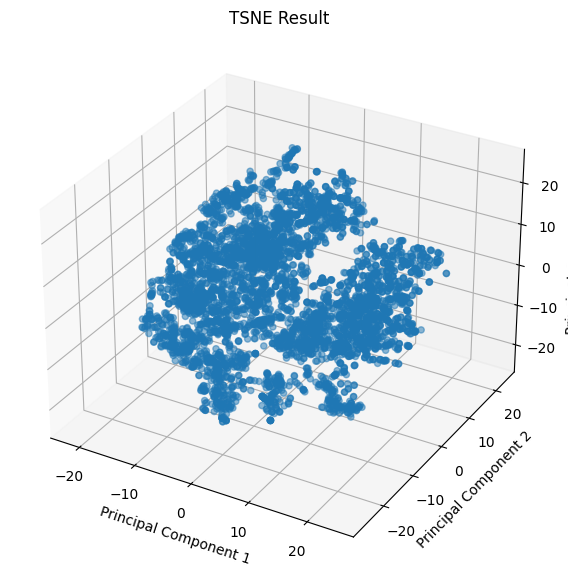

In [40]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Correct concatenation of NumPy arrays
combined_data = np.concatenate([X_transformed, X_transformed_Indicators, df_categorical_encoded], axis=1)


# Convert the concatenated array to a DataFrame
combined_data_df = pd.DataFrame(combined_data)

# Now, 'combined_data_df' is a pandas DataFrame of your concatenated data

# Now apply t-SNE to the combined data
tsne = TSNE(n_components=3, perplexity=30, random_state=0)
combined_data_tsne = tsne.fit_transform(combined_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne[:, 0], combined_data_tsne[:, 1], combined_data_tsne[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('TSNE Result')
plt.show()



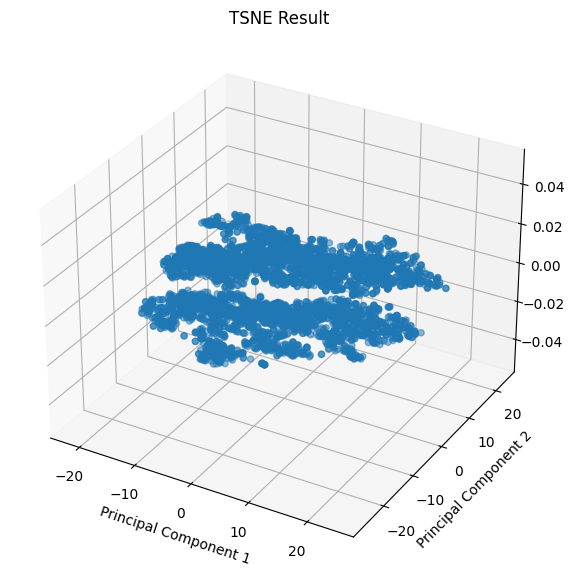

In [41]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Now apply t-SNE to the combined data
tsne2 = TSNE(n_components=2, perplexity=30, random_state=0)
combined_data_tsne2 = tsne.fit_transform(combined_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.title('TSNE Result')
plt.show()



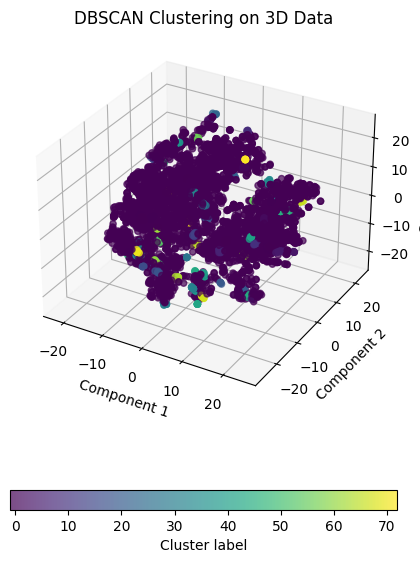

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Your DBSCAN clustering setup remains the same
eps_optimal = 0.7  # Adjust based on your dataset
dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(combined_data_tsne)

# Plotting the result in a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # Set up a 3D projection

# Store the output of the scatter plot in a variable
scatter = ax.scatter(combined_data_tsne[:, 0], combined_data_tsne[:, 1], combined_data_tsne[:, 2], 
                     c=dbscan_labels, cmap='viridis', alpha=0.7)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('DBSCAN Clustering on 3D Data')

# Use the scatter plot object as the mappable for colorbar creation
plt.colorbar(scatter, label='Cluster label', shrink=0.5, orientation='horizontal')

plt.show()


In [43]:
print(set(dbscan_labels))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, -1}


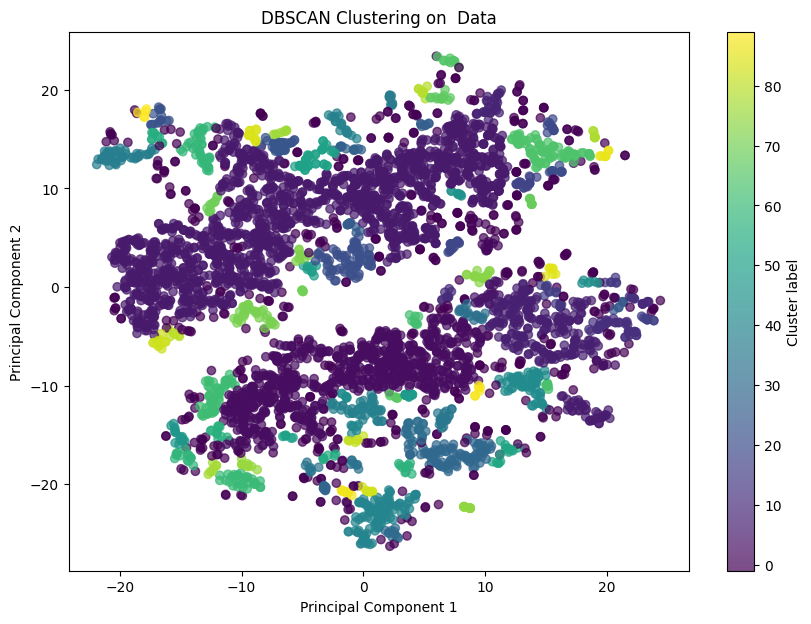

In [44]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(combined_data_tsne2[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on  Data')
plt.colorbar(label='Cluster label')

plt.show()


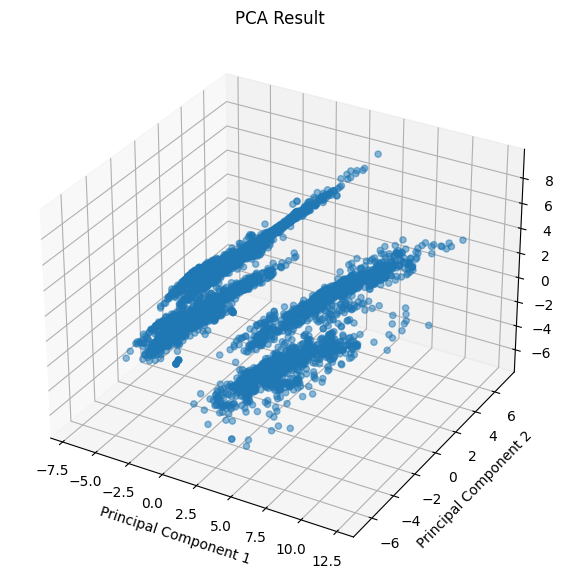

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


n_components = 3

# Initialize PCA
pca = PCA(n_components=n_components)
pca1= PCA(2)
# Fit PCA on the dataset and transform the data
pca_result = pca.fit_transform(combined_data)
pca_result1 = pca1.fit_transform(combined_data)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA Result')
plt.show()

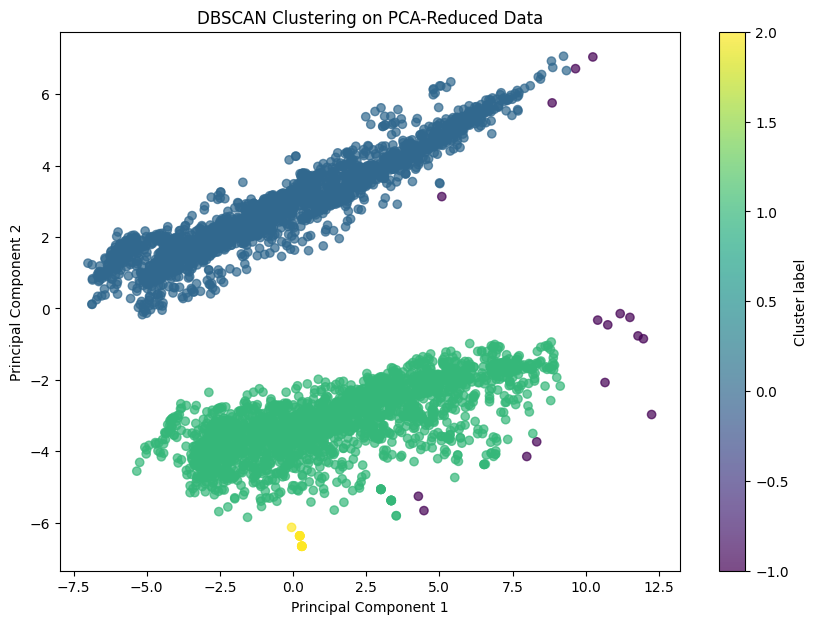

In [46]:
from sklearn.cluster import DBSCAN

eps_optimal = 0.7 #

dbscan = DBSCAN(eps=eps_optimal, min_samples=6)  # Adjust min_samples as needed
dbscan_labels = dbscan.fit_predict(pca_result1[:, :2])  # Only use the first two components

# Plotting the result in a 2D scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.colorbar(label='Cluster label')

plt.show()


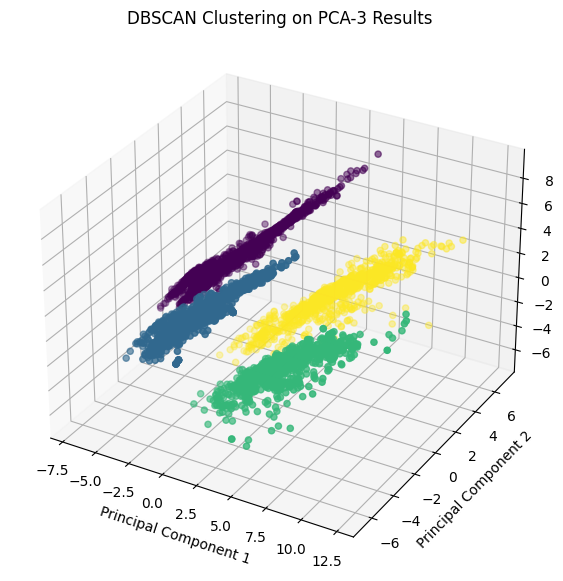

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'pca_result' is the result of PCA with at least 3 components
eps_optimal = 2.5

# Apply DBSCAN to the 3D PCA results
dbscan = DBSCAN(eps=eps_optimal, min_samples=6)
dbscan_labels = dbscan.fit_predict(pca_result)  # Use the full PCA result for DBSCAN

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=dbscan_labels, cmap='viridis')

# Adding labels and title
ax.set_title('DBSCAN Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')



plt.show()


In [67]:
silhouette_avg_dbscan = silhouette_score(pca_result, dbscan_labels)
print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.3f}")

Silhouette Score for DBSCAN: 0.510


In [52]:
from sklearn.metrics import davies_bouldin_score

db_index= davies_bouldin_score(pca_result,dbscan_labels)
print("Davis-bouldin index:",db_index)

Davis-bouldin index: 1.6126400045272153


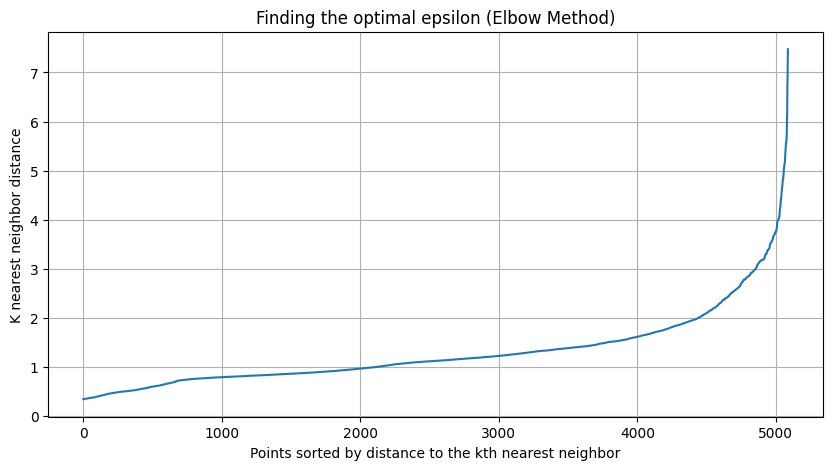

In [53]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming pca_result_3d is your PCA result with 3 components
# Using 3 principal components from the previous PCA step

# Set the number of neighbors for the kth nearest neighbor calculation
# Typically, min_samples parameter of DBSCAN starts at MinPts = 2 * number of dimensions (here, 6 for 3D data)
min_samples = 200

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result)
distances, indices = neighbors.kneighbors(pca_result)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


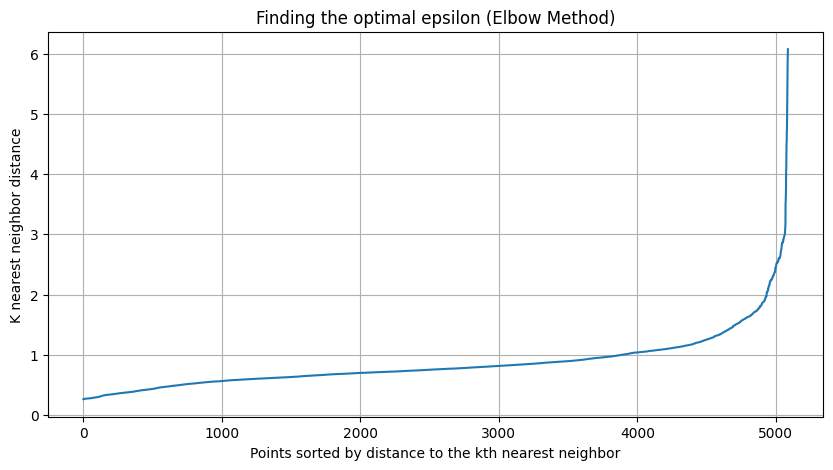

In [54]:
min_samples = 200

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result1)
distances, indices = neighbors.kneighbors(pca_result1)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('K nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


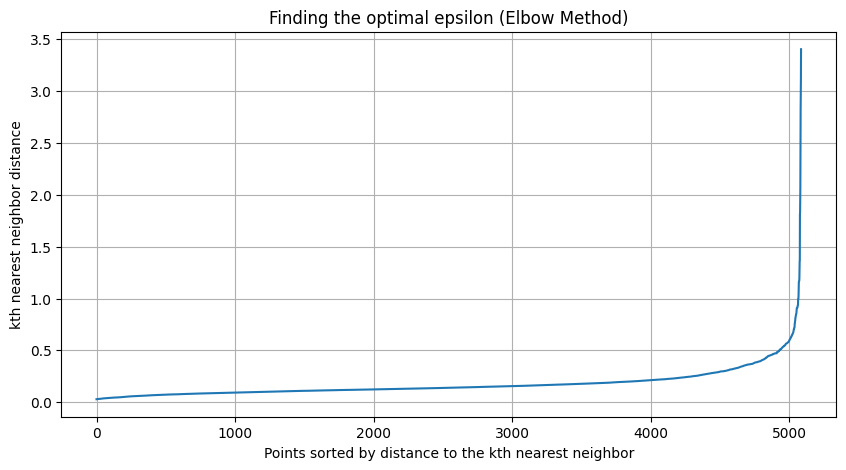

In [55]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming pca_result_3d is your PCA result with 3 components
# Using 3 principal components from the previous PCA step

# Set the number of neighbors for the kth nearest neighbor calculation
# Typically, min_samples parameter of DBSCAN starts at MinPts = 2 * number of dimensions (here, 6 for 3D data)
min_samples = 10

# Compute the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors = nearest_neighbors.fit(pca_result1)
distances, indices = neighbors.kneighbors(pca_result1)

# Sort the distances
sorted_distances = np.sort(distances[:, min_samples-1], axis=0)

# Plotting the k-distance graph to find the optimal epsilon
plt.figure(figsize=(10, 5))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance to the kth nearest neighbor')
plt.ylabel('kth nearest neighbor distance')
plt.title('Finding the optimal epsilon (Elbow Method)')
plt.grid(True)
plt.show()


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

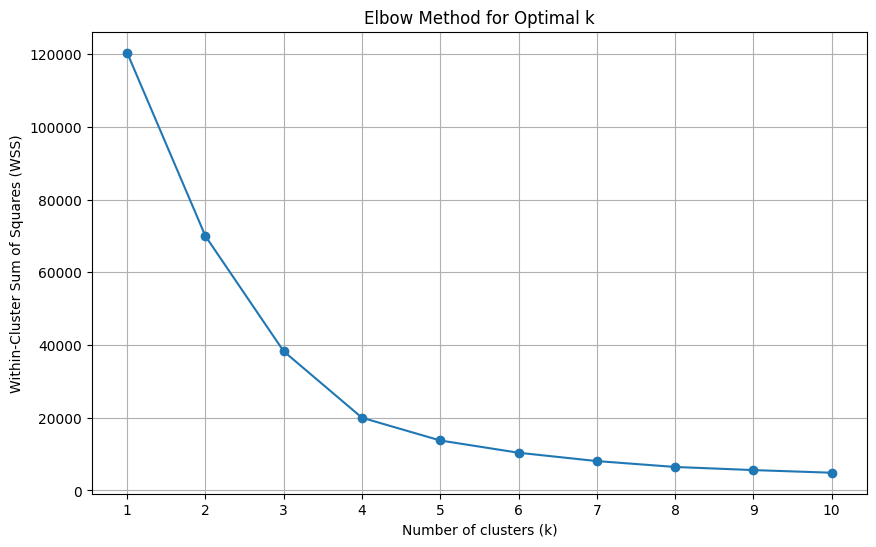

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming combined_data is your dataset ready for clustering

# Decide the range of k values to evaluate
k_values = range(1, 11)  # For example, from 1 to 10

# Initialize an empty list to store the WSS for each k
wss_values = []

for k in k_values:
    # Initialize KMeans with the current k value
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit KMeans on the dataset
    kmeans.fit(pca_result1)
    
    # Append the inertia (WSS) of the current model to the list
    wss_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


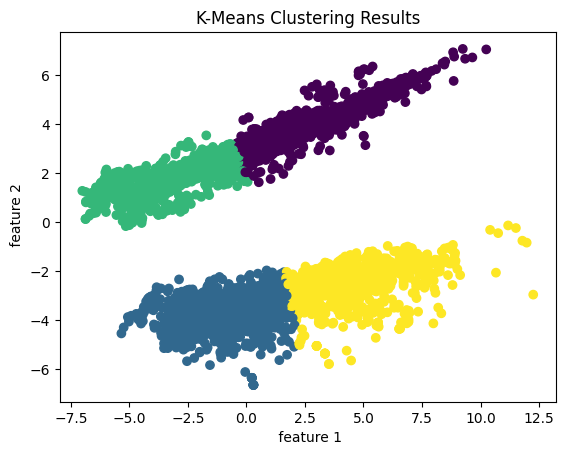

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result1)

# Plotting the results
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


In [58]:
silhouette_avg = silhouette_score(pca_result1, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

Silhouette Score for 4 clusters: 0.572


In [59]:
import pandas as pd

# Convert combined_data to a DataFrame if it isn't already
combined_data_df = pd.DataFrame(combined_data)

# Assuming kmeans_labels is an array of labels you want to add as a new column
combined_data_df['Predicted_Class'] = kmeans_labels
combined_data_df.head(20)
combined_data_df.columns
combined_data_df.head()

0         1         2         3         4         5        6  \
0  1.528950 -1.656549  1.923954  1.184377  2.218608  1.946755  0.18548   
1  1.505878  1.692025  1.925024  1.179402  2.222560  1.926265  0.18548   
2  1.466471  2.036049  1.883766  1.107916  2.226232  1.867464  0.18548   
3  1.441708 -0.967563  1.801127  0.945616  2.228800  1.796892  0.18548   
4  1.674413 -1.783144  2.031732  0.976471  2.553866  2.017582  0.18548   

          7         8         9  ...   33   34   35   36   37   38   39   40  \
0  2.384797  1.358924 -0.497809  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  2.323230  1.206159 -0.497809  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  2.273902  1.211221 -0.497809  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  2.261398  1.198134 -0.497809  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  2.418110  1.340962  2.628965  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

    41  Predicted_Class  
0  1.0                0  
1  1.0                0  
2  1.0                0  
3  1.0                0  
4  1.0                3  

[5 rows x 43 columns]

C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


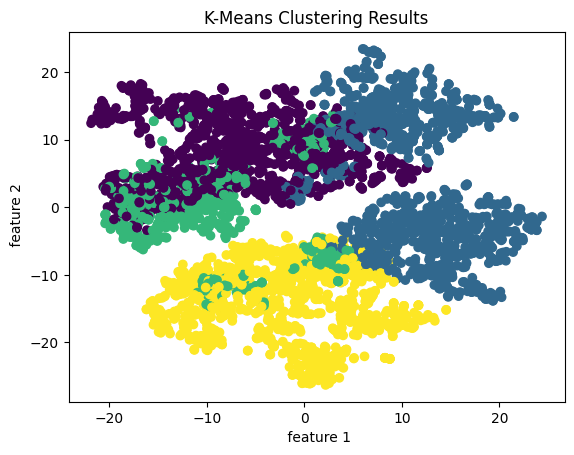

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(combined_data_tsne2)

# Plotting the results
plt.scatter(combined_data_tsne2[:, 0], combined_data_tsne2[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()


C:\Users\annak\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


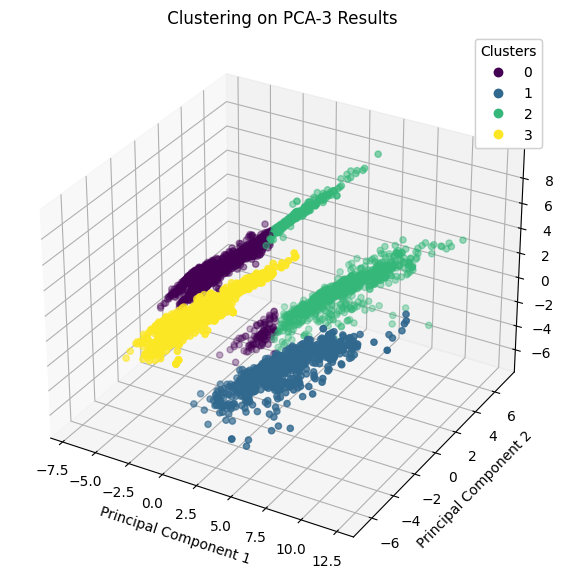

In [61]:

k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_labels = kmeans.fit_predict(pca_result)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=kmeans_labels, cmap='viridis', label=kmeans_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [62]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
silhouette_avg = silhouette_score(pca_result, kmeans_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

Silhouette Score for 4 clusters: 0.494


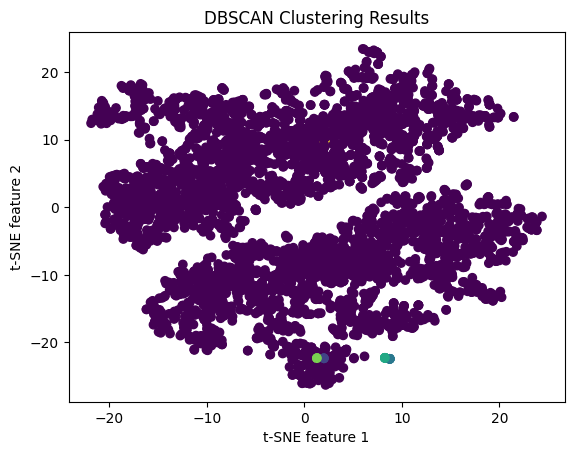

In [63]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Example values; adjust based on your data
dbscan_labels = dbscan.fit_predict(combined_data)

# Plotting the results
plt.scatter(combined_data_tsne[:, 0], combined_data_tsne[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering Results')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


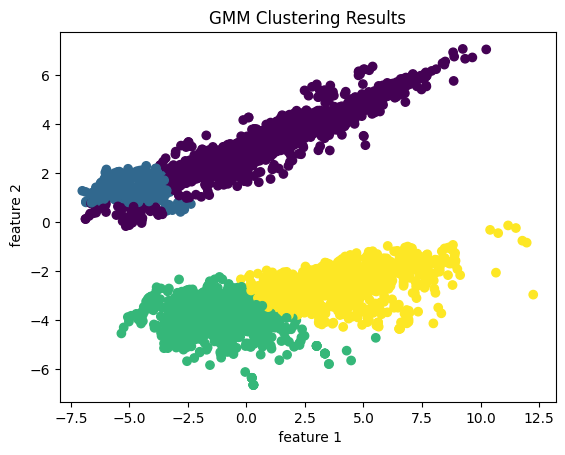

Silhouette Score for 4 clusters: 0.456


In [68]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Number of components (clusters) to fit
n_components = 4
 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result1)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result1, gmm_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

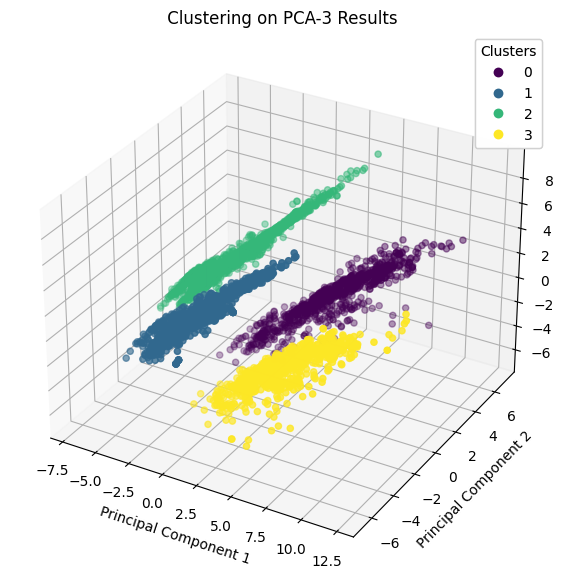

In [65]:
# Number of components (clusters) to fit
n_components = 4 # Example value; adjust based on your analysis

# Instantiate and fit the model
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm_labels = gmm.fit_predict(pca_result)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the PCA results colored by DBSCAN cluster labels
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=gmm_labels, cmap='viridis', label=gmm_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [69]:
silhouette_avg_gmm = silhouette_score(pca_result, gmm_labels)
print(f"Silhouette Score for GMM (EM): {silhouette_avg_gmm:.3f}")


Silhouette Score for GMM (EM): 0.363


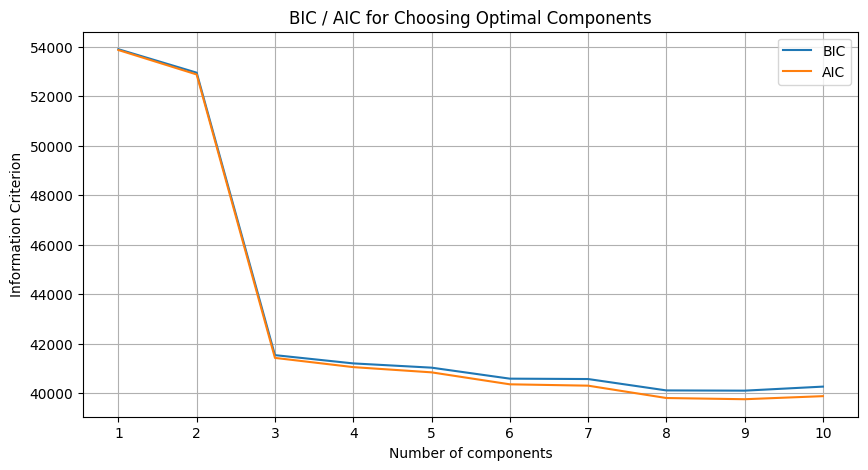

In [70]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your 2D dataset after PCA
n_components_range = range(1, 11)  # Range of possible components
bics = []
aics = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(pca_result1)
    bics.append(gmm.bic(pca_result1))
    aics.append(gmm.aic(pca_result1))

# Plotting the BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.title('BIC / AIC for Choosing Optimal Components')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()


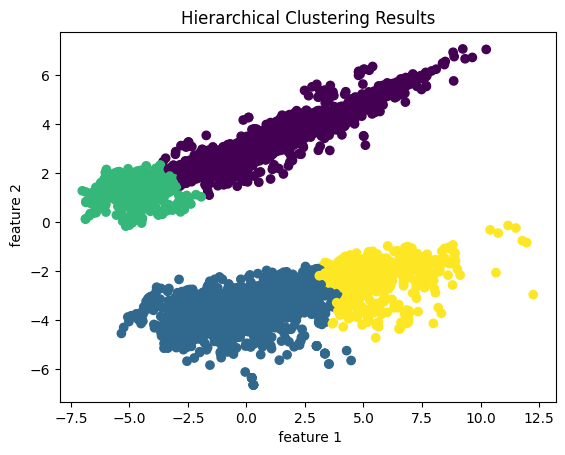

Silhouette Score for 4 clusters: 0.492


In [73]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Assuming combined_data is your dataset

# Instantiate and fit the model
# The number of clusters is optional; if not specified, each sample is its own cluster
# 'ward' linkage minimizes the variance of clusters being merged
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(pca_result1)

# Plotting (if you've applied t-SNE for dimensionality reduction)
plt.scatter(pca_result1[:, 0], pca_result1[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
silhouette_avg = silhouette_score(pca_result1, hierarchical_labels)

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

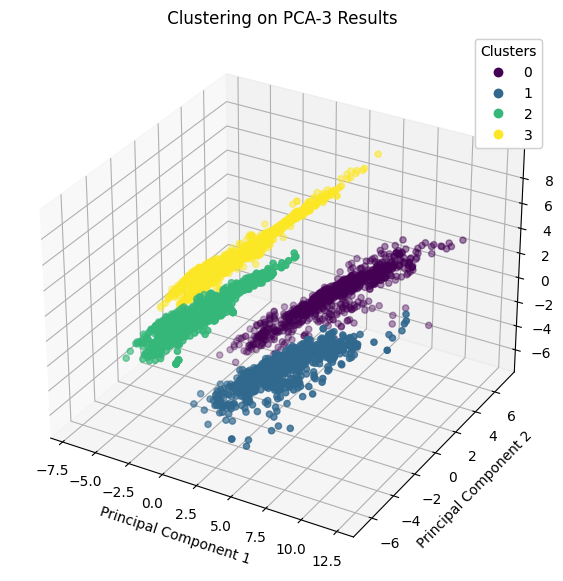

In [74]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='single') ## can be changed
hierarchical_labels = hierarchical.fit_predict(pca_result)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], 
                     c=hierarchical_labels, cmap='viridis', label=hierarchical_labels)

# Adding labels and title
ax.set_title(' Clustering on PCA-3 Results')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [75]:
silhouette_avg_hierarchical = silhouette_score(pca_result, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_avg_hierarchical:.3f}")

Silhouette Score for Hierarchical Clustering: 0.510


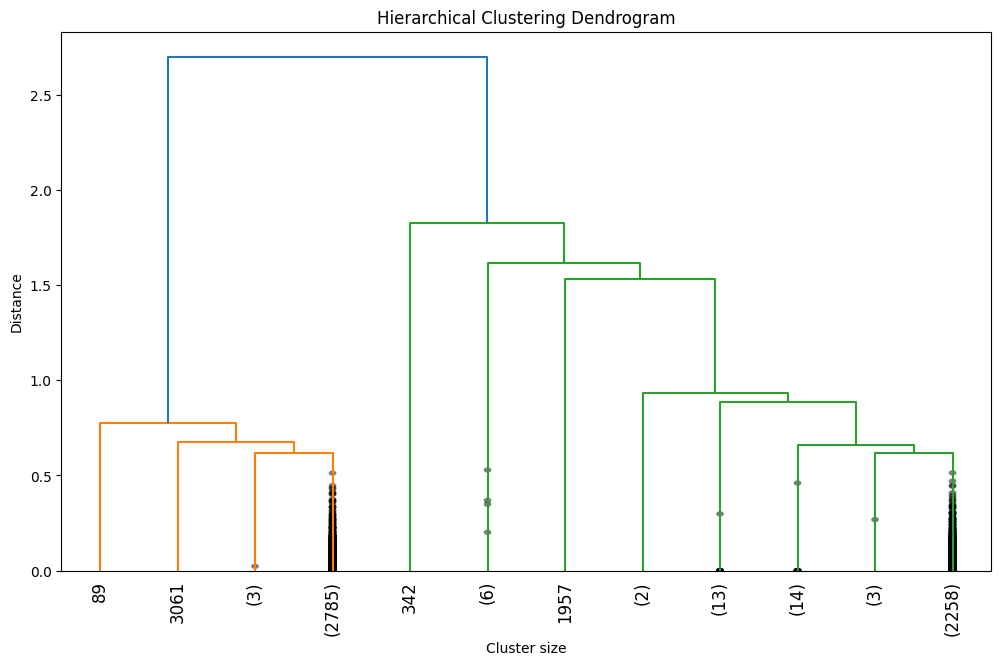

In [76]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming pca_result_2d is your dataset after dimensionality reduction
# Generate the linkage matrix using Ward's method
Z = linkage(pca_result1, 'single')

# Plotting the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=12,  # show only the last 12 merged clusters
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

# This line draws a threshold line to help identify the number of clusters
plt.axhline(y=25, color='r', linestyle='--')  # Adjust 'y' based on your dendrogram

plt.show()


### Model


### Second Approach -Nir 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import numpy as np



def custom_normalize_row(row):
    max_abs_value = np.max(np.abs(row))
    if max_abs_value == 0:
        return row
    else:
        return row / max_abs_value

# Apply the custom row-wise normalization to each DataFrame
monetary_df_scaled_row = numric_df.apply(custom_normalize_row, axis=1)
ratios_df_scaled_row = Ratio_df.apply(custom_normalize_row, axis=1)
if isinstance(df_categorical_encoded, np.ndarray):
    # Assuming you want to name the columns based on the encoding process
    # This step might need adjustment based on how df_categorical_encoded was created
    df_categorical_encoded = pd.DataFrame(df_categorical_encoded, columns=[f'Cat_{i}' for i in range(df_categorical_encoded.shape[1])])

df_scaled_combined = pd.concat([monetary_df_scaled_row, ratios_df_scaled_row, df_categorical_encoded], axis=1)
# Convert df_categorical_encoded to a DataFrame if it's a NumPy array




In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)  # n_components can be 2 or 3 for visualization
tsne_results = tsne.fit_transform(df_scaled_combined)

In [ ]:
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'])
plt.title('t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show() 


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_tsne)


df_tsne['Cluster'] = clusters


plt.figure(figsize=(8, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['Cluster'])
plt.title('DBSCAN Clustering over t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.colorbar(label='Cluster Label')
plt.show() 



In [ ]:
from sklearn.cluster import KMeans


k = 4  # Example number of clusters

kmeans = KMeans(n_clusters=k, random_state=42)
df_tsne['Cluster'] = kmeans.fit_predict(df_tsne[['TSNE1', 'TSNE2']])
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('K-means Clustering on t-SNE Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

In [ ]:
silhouette_avg = silhouette_score(df_scaled_combined, df_tsne['Cluster'])

print(f"Silhouette Score for {k} clusters: {silhouette_avg:.3f}")

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

import seaborn as sns

# Assuming df_tsne already contains TSNE1 and TSNE2 columns
# Add the GMM labels to df_tsne for plotting
df_tsne['GMM_Cluster'] = gmm_labels

# Plotting with the correct labels
sns.scatterplot(x='TSNE1', y='TSNE2', hue='GMM_Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('GMM Clustering Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_data is your dataset and df_tsne is the DataFrame with TSNE1 and TSNE2 columns

# Instantiate and fit the model
hierarchical = AgglomerativeClustering(n_clusters=6, linkage='ward')
# Perform hierarchical clustering on the t-SNE reduced dimensions
hierarchical_labels = hierarchical.fit_predict(df_tsne[['TSNE1', 'TSNE2']])

# Add the hierarchical clustering labels to df_tsne for plotting
df_tsne['Hierarchical_Cluster'] = hierarchical_labels

# Plotting the hierarchical clustering results
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Hierarchical_Cluster', data=df_tsne, palette='viridis', legend="full")
plt.title('Hierarchical Clustering Results')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()
